In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt

In [37]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
columns = ['장소 혼잡도 지표','최소 인구 평균','최대 인구 평균', '남성비율', '여성비율', '0~10세 실시간 인구비율', '10대 실시간 인구비율', '20대 실시간 인구비율', '30대 실시간 인구비율', '40대 실시간 인구비율', '50대 실시간 인구비율', '60대 실시간 인구비율', '70대 실시간 인구비율', '상주인구 비율', '실시간 업데이트시간', '기온', '체감온도', '습도', '강수량', '자외선 지수', '초미세먼지농도', '미세먼지농도', '(자치구)확진자수', '(자치구)확진자 추가', '서울 확진자수', '서울 확진자추가', '서울시 사망자수', '당일 사망자수','장소명'] 


In [39]:
seoul_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/프로젝트/df_tot.0219_13-0220_09csv.csv', encoding='cp949')

In [40]:
seoul_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8840 entries, 0 to 8839
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AREA_CONGEST_LVL   8840 non-null   object 
 1   AREA_PPLTN_MIN     8840 non-null   int64  
 2   AREA_PPLTN_MAX     8840 non-null   int64  
 3   MALE_PPLTN_RATE    8840 non-null   float64
 4   FEMALE_PPLTN_RATE  8840 non-null   float64
 5   PPLTN_RATE_0       8840 non-null   float64
 6   PPLTN_RATE_10      8840 non-null   float64
 7   PPLTN_RATE_20      8840 non-null   float64
 8   PPLTN_RATE_30      8840 non-null   float64
 9   PPLTN_RATE_40      8840 non-null   float64
 10  PPLTN_RATE_50      8840 non-null   float64
 11  PPLTN_RATE_60      8840 non-null   float64
 12  PPLTN_RATE_70      8840 non-null   float64
 13  RESNT_PPLTN_RATE   8840 non-null   float64
 14  PPLTN_TIME         8840 non-null   object 
 15  TEMP               8840 non-null   float64
 16  SENSIBLE_TEMP      8840 

In [41]:
seoul_df.columns = columns

In [42]:
seoul_df['장소 혼잡도 지표'].value_counts()

여유       6942
보통       1119
약간 붐빔     549
붐빔        230
Name: 장소 혼잡도 지표, dtype: int64

In [43]:
   # 여유 - 0.5 , 보통 - 1.5 , 약간 붐빔-2.5, 붐빔 - 3.5
seoul_df['숫자지표'] = seoul_df['장소 혼잡도 지표'].apply(lambda x: 0.5 if x == '여유' else 1.5 if x=='보통' else 2.5 if x=='약간 붐빔' else 3.5)

In [44]:
seoul_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8840 entries, 0 to 8839
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   장소 혼잡도 지표       8840 non-null   object 
 1   최소 인구 평균        8840 non-null   int64  
 2   최대 인구 평균        8840 non-null   int64  
 3   남성비율            8840 non-null   float64
 4   여성비율            8840 non-null   float64
 5   0~10세 실시간 인구비율  8840 non-null   float64
 6   10대 실시간 인구비율    8840 non-null   float64
 7   20대 실시간 인구비율    8840 non-null   float64
 8   30대 실시간 인구비율    8840 non-null   float64
 9   40대 실시간 인구비율    8840 non-null   float64
 10  50대 실시간 인구비율    8840 non-null   float64
 11  60대 실시간 인구비율    8840 non-null   float64
 12  70대 실시간 인구비율    8840 non-null   float64
 13  상주인구 비율         8840 non-null   float64
 14  실시간 업데이트시간      8840 non-null   object 
 15  기온              8840 non-null   float64
 16  체감온도            8840 non-null   float64
 17  습도              8840 non-null   i

In [45]:
seoul_df['숫자지표'].value_counts()

0.5    6942
1.5    1119
2.5     549
3.5     230
Name: 숫자지표, dtype: int64

In [46]:
seoul_df.head()

,장소 혼잡도 지표,최소 인구 평균,최대 인구 평균,남성비율,여성비율,0~10세 실시간 인구비율,10대 실시간 인구비율,20대 실시간 인구비율,30대 실시간 인구비율,40대 실시간 인구비율,50대 실시간 인구비율,60대 실시간 인구비율,70대 실시간 인구비율,상주인구 비율,실시간 업데이트시간,기온,체감온도,습도,강수량,자외선 지수,초미세먼지농도,미세먼지농도,(자치구)확진자수,(자치구)확진자 추가,서울 확진자수,서울 확진자추가,서울시 사망자수,당일 사망자수,장소명,숫자지표
0,붐빔,28000,30000,40.7,59.3,0.5,11.1,27.8,28.3,17.8,8.5,4.0,1.9,6.6,2023-02-19 13:30,5.6,4.8,27,-,2,39,51,300535,107,5908302,1906,6323,1,강남 MICE 관광특구,3.5
1,보통,18000,20000,46.3,53.7,0.4,6.9,20.1,22.3,17.9,15.7,10.8,6.0,10.5,2023-02-19 13:30,5.3,4.1,39,-,2,44,47,71006,22,5908302,1906,6323,1,동대문 관광특구,1.5
2,여유,32000,34000,44.0,56.0,0.5,5.9,22.5,24.1,19.8,13.8,8.6,4.9,10.9,2023-02-19 13:30,5.3,4.1,39,-,2,0,0,71006,22,5908302,1906,6323,1,명동 관광특구,0.5
3,여유,9000,9500,45.2,54.8,0.8,4.6,32.1,26.2,15.9,9.4,6.8,4.1,15.2,2023-02-19 13:30,6.0,5.9,30,-,2,42,49,121622,34,5908302,1906,6323,1,이태원 관광특구,0.5
4,약간 붐빔,62000,64000,41.6,58.4,1.1,17.5,21.1,23.0,16.4,10.2,7.0,3.7,8.8,2023-02-19 13:30,6.4,6.2,29,-,2,43,51,386365,122,5908302,1906,6323,1,잠실 관광특구,2.5


In [47]:
seoul_df['인구'] = seoul_df['최소 인구 평균'] +(seoul_df['최대 인구 평균']-seoul_df['최소 인구 평균'])/4 * seoul_df['숫자지표']

In [48]:
pd.set_option('display.max_columns',50)

In [49]:
seoul_df.head()


,장소 혼잡도 지표,최소 인구 평균,최대 인구 평균,남성비율,여성비율,0~10세 실시간 인구비율,10대 실시간 인구비율,20대 실시간 인구비율,30대 실시간 인구비율,40대 실시간 인구비율,50대 실시간 인구비율,60대 실시간 인구비율,70대 실시간 인구비율,상주인구 비율,실시간 업데이트시간,기온,체감온도,습도,강수량,자외선 지수,초미세먼지농도,미세먼지농도,(자치구)확진자수,(자치구)확진자 추가,서울 확진자수,서울 확진자추가,서울시 사망자수,당일 사망자수,장소명,숫자지표,인구
0,붐빔,28000,30000,40.7,59.3,0.5,11.1,27.8,28.3,17.8,8.5,4.0,1.9,6.6,2023-02-19 13:30,5.6,4.8,27,-,2,39,51,300535,107,5908302,1906,6323,1,강남 MICE 관광특구,3.5,29750.0
1,보통,18000,20000,46.3,53.7,0.4,6.9,20.1,22.3,17.9,15.7,10.8,6.0,10.5,2023-02-19 13:30,5.3,4.1,39,-,2,44,47,71006,22,5908302,1906,6323,1,동대문 관광특구,1.5,18750.0
2,여유,32000,34000,44.0,56.0,0.5,5.9,22.5,24.1,19.8,13.8,8.6,4.9,10.9,2023-02-19 13:30,5.3,4.1,39,-,2,0,0,71006,22,5908302,1906,6323,1,명동 관광특구,0.5,32250.0
3,여유,9000,9500,45.2,54.8,0.8,4.6,32.1,26.2,15.9,9.4,6.8,4.1,15.2,2023-02-19 13:30,6.0,5.9,30,-,2,42,49,121622,34,5908302,1906,6323,1,이태원 관광특구,0.5,9062.5
4,약간 붐빔,62000,64000,41.6,58.4,1.1,17.5,21.1,23.0,16.4,10.2,7.0,3.7,8.8,2023-02-19 13:30,6.4,6.2,29,-,2,43,51,386365,122,5908302,1906,6323,1,잠실 관광특구,2.5,63250.0


In [50]:
seoul_df['위험여부'] = seoul_df['장소 혼잡도 지표'].apply(lambda x: 0 if x in [ '여유' ,'보통' ,'약간 붐빔'] else 1)


In [51]:
seoul_df.head()


,장소 혼잡도 지표,최소 인구 평균,최대 인구 평균,남성비율,여성비율,0~10세 실시간 인구비율,10대 실시간 인구비율,20대 실시간 인구비율,30대 실시간 인구비율,40대 실시간 인구비율,50대 실시간 인구비율,60대 실시간 인구비율,70대 실시간 인구비율,상주인구 비율,실시간 업데이트시간,기온,체감온도,습도,강수량,자외선 지수,초미세먼지농도,미세먼지농도,(자치구)확진자수,(자치구)확진자 추가,서울 확진자수,서울 확진자추가,서울시 사망자수,당일 사망자수,장소명,숫자지표,인구,위험여부
0,붐빔,28000,30000,40.7,59.3,0.5,11.1,27.8,28.3,17.8,8.5,4.0,1.9,6.6,2023-02-19 13:30,5.6,4.8,27,-,2,39,51,300535,107,5908302,1906,6323,1,강남 MICE 관광특구,3.5,29750.0,1
1,보통,18000,20000,46.3,53.7,0.4,6.9,20.1,22.3,17.9,15.7,10.8,6.0,10.5,2023-02-19 13:30,5.3,4.1,39,-,2,44,47,71006,22,5908302,1906,6323,1,동대문 관광특구,1.5,18750.0,0
2,여유,32000,34000,44.0,56.0,0.5,5.9,22.5,24.1,19.8,13.8,8.6,4.9,10.9,2023-02-19 13:30,5.3,4.1,39,-,2,0,0,71006,22,5908302,1906,6323,1,명동 관광특구,0.5,32250.0,0
3,여유,9000,9500,45.2,54.8,0.8,4.6,32.1,26.2,15.9,9.4,6.8,4.1,15.2,2023-02-19 13:30,6.0,5.9,30,-,2,42,49,121622,34,5908302,1906,6323,1,이태원 관광특구,0.5,9062.5,0
4,약간 붐빔,62000,64000,41.6,58.4,1.1,17.5,21.1,23.0,16.4,10.2,7.0,3.7,8.8,2023-02-19 13:30,6.4,6.2,29,-,2,43,51,386365,122,5908302,1906,6323,1,잠실 관광특구,2.5,63250.0,0


In [52]:
# 드랍시킬 컬럼:['장소 혼잡도 지표',	'최소 인구 평균',	'최대 인구 평균', '(자치구)확진자수']


In [53]:
# 데이트 타입으로 바꿔서 시간 가져오기
from datetime import datetime

seoul_df['실시간 업데이트시간'] = pd.to_datetime(seoul_df['실시간 업데이트시간'])


In [54]:
seoul_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8840 entries, 0 to 8839
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   장소 혼잡도 지표       8840 non-null   object        
 1   최소 인구 평균        8840 non-null   int64         
 2   최대 인구 평균        8840 non-null   int64         
 3   남성비율            8840 non-null   float64       
 4   여성비율            8840 non-null   float64       
 5   0~10세 실시간 인구비율  8840 non-null   float64       
 6   10대 실시간 인구비율    8840 non-null   float64       
 7   20대 실시간 인구비율    8840 non-null   float64       
 8   30대 실시간 인구비율    8840 non-null   float64       
 9   40대 실시간 인구비율    8840 non-null   float64       
 10  50대 실시간 인구비율    8840 non-null   float64       
 11  60대 실시간 인구비율    8840 non-null   float64       
 12  70대 실시간 인구비율    8840 non-null   float64       
 13  상주인구 비율         8840 non-null   float64       
 14  실시간 업데이트시간      8840 non-null   datetime64[ns]
 15  기온  

In [55]:

days = ['월요일','화요일','수요일','목요일','금요일','토요일','일요일']
seoul_df['요일'] = seoul_df['실시간 업데이트시간'].dt.weekday
seoul_df['시간대'] = seoul_df['실시간 업데이트시간'].dt.hour


In [56]:
seoul_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8840 entries, 0 to 8839
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   장소 혼잡도 지표       8840 non-null   object        
 1   최소 인구 평균        8840 non-null   int64         
 2   최대 인구 평균        8840 non-null   int64         
 3   남성비율            8840 non-null   float64       
 4   여성비율            8840 non-null   float64       
 5   0~10세 실시간 인구비율  8840 non-null   float64       
 6   10대 실시간 인구비율    8840 non-null   float64       
 7   20대 실시간 인구비율    8840 non-null   float64       
 8   30대 실시간 인구비율    8840 non-null   float64       
 9   40대 실시간 인구비율    8840 non-null   float64       
 10  50대 실시간 인구비율    8840 non-null   float64       
 11  60대 실시간 인구비율    8840 non-null   float64       
 12  70대 실시간 인구비율    8840 non-null   float64       
 13  상주인구 비율         8840 non-null   float64       
 14  실시간 업데이트시간      8840 non-null   datetime64[ns]
 15  기온  

In [57]:
seoul_df['주말여부'] = seoul_df['요일'].apply(lambda x: 0 if x in [ 0,1,2,3,4] else 1)


In [58]:
seoul_df.tail()

,장소 혼잡도 지표,최소 인구 평균,최대 인구 평균,남성비율,여성비율,0~10세 실시간 인구비율,10대 실시간 인구비율,20대 실시간 인구비율,30대 실시간 인구비율,40대 실시간 인구비율,50대 실시간 인구비율,60대 실시간 인구비율,70대 실시간 인구비율,상주인구 비율,실시간 업데이트시간,기온,체감온도,습도,강수량,자외선 지수,초미세먼지농도,미세먼지농도,(자치구)확진자수,(자치구)확진자 추가,서울 확진자수,서울 확진자추가,서울시 사망자수,당일 사망자수,장소명,숫자지표,인구,위험여부,요일,시간대,주말여부
8835,여유,7500,8000,60.7,39.3,0.2,2.4,12.6,24.5,23.8,18.8,12.7,4.8,15.5,2023-02-20 08:15:00,0.4,-0.3,35,-,0,9,37,168465,39,5908302,1906,6323,1,서울숲공원,0.5,7562.5,0,0,8,0
8836,여유,4500,5000,60.1,39.9,0.3,3.2,11.6,20.6,26.3,20.0,11.5,6.5,8.0,2023-02-20 08:15:00,0.6,0.3,39,-,0,6,29,219588,73,5908302,1906,6323,1,월드컵공원,0.5,4562.5,0,0,8,0
8837,보통,4500,5000,54.0,46.0,0.2,2.8,16.0,23.1,24.4,18.4,9.8,5.3,7.7,2023-02-20 08:15:00,0.6,-0.5,38,-,0,12,44,121622,34,5908302,1906,6323,1,이촌한강공원,1.5,4687.5,0,0,8,0
8838,여유,2000,2500,60.6,39.4,0.0,5.4,12.0,16.5,29.8,20.8,9.7,5.7,5.4,2023-02-20 08:15:00,0.9,0.8,33,-,0,9,39,386365,122,5908302,1906,6323,1,잠실종합운동장,0.5,2062.5,0,0,8,0
8839,보통,4000,4500,55.5,44.5,0.7,5.3,13.7,19.0,28.2,17.6,10.7,4.7,7.2,2023-02-20 08:15:00,0.7,0.7,30,-,0,9,39,386365,122,5908302,1906,6323,1,잠실한강공원,1.5,4187.5,0,0,8,0



재혁
- 온도에 따른 위치별 밀집도 - 꺾은선
- 미세먼지농도에따른 위치별 밀집도  -꺾은선
- 코로나 추가 확진자에 따른 위치별 밀집도 - 꺾은선
- 휴일여부에따른 위치별 밀집도 - 막대
- 시간에 따른 위치별 밀집도 - 막대


윤영
- 선형 회귀: 위치별 - x:휴일여부, 시간대, 온도, 미세먼지농도, 코로나 추가 확진자  y:인구 -> 상권분석

영현
- 로지스틱 회귀 -  x:휴일여부, 시간대, 온도, 미세먼지농도, 코로나 추가 확진자 y: 위험여부 -> 개인 결정 및 지자체 정책수립
- 실시간 지도 뽑아주세요!

다끝나면
- 의사결정나무 -> 인구를 결정할때, 어떤순서로 결정하는지 5개 순위 ->
- 랜덤 포레스트 - 우리는 데이터가 아직 적어서 ...

In [59]:
# # 온도에 따른 위치별 밀집도 - 꺾은선
# plt.xlabel(x=seoul_df['기온']) #x 라벨
# plt.ylabel(y=seoul_df['인구']) #y 라벨
# plt.title("온도") #그래프 이름

# #그래프 출력
# plt.show()

TypeError: ignored

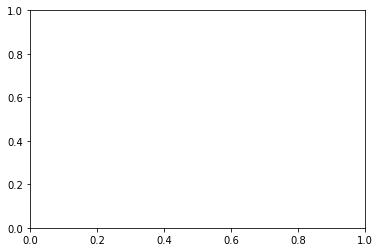

In [60]:
# 미세먼지농도에따른 위치별 밀집도  -꺾은선
# plt.plot(x=seoul_df['미세먼지농도'], y=seoul_df['인구'])

In [ ]:
# 코로나 추가 확진자에 따른 위치별 밀집도 - 꺾은선
# plt.plot(x=seoul_df['서울확진자추가'], y=seoul_df['인구'])

In [ ]:
# 휴일여부에따른 위치별 밀집도 - 막대
# sns.barplot(x=seoul_df['주말여부'], y=seoul_df['인구'])

In [61]:
woods_df = seoul_df[seoul_df['장소명'] == '서울숲공원']

In [ ]:
# 시간에 따른 위치별 밀집도 - 막대
sns.barplot(x=seoul_df['시간대'], y=seoul_df['인구'])

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text

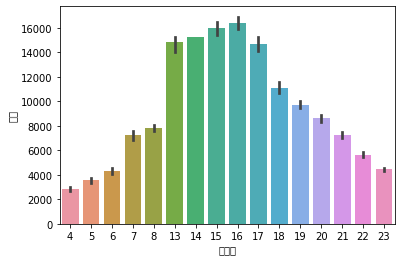

In [62]:
sns.barplot(x=woods_df['시간대'],y=woods_df['인구'])